<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(len(data.columns))
print('--------------------------------------')
print(data.isnull().sum())
print('--------------------------------------')
data.info()


22
--------------------------------------
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 no

### Вывод

1. Есть пропуски в большинстве столбцов
2. first_day_exposition не в формате даты 
3. floors_total количество этажей в дробном формате, при том, что floor в формате целых числе 
4. is_apartment по вводным данным должен быть формата bool
5. parks_around3000 количество парков должно быть int 
6. ponds_around3000 аналогично по количеству водоемов
7. days_exposition количество дней лучше ривести в int 

Форматы необходимо преобразоват. С пропусками необходимо разбираться, так как их очень много, может в этом есть закономерность. 

## Предобработка данных

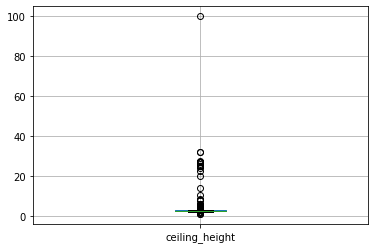

2.65

----------------------------------------------------------------------------------------



In [2]:
#ceiling_height           9195
#floors_total               86
#living_area              1903
#is_apartment            20924
#kitchen_area             2278
#balcony                 11519
#locality_name              49
#airports_nearest         5542
#cityCenters_nearest      5519
#parks_around3000         5518
#parks_nearest           15620
#ponds_around3000         5518
#ponds_nearest           14589
#days_exposition          3181

data.boxplot(column='ceiling_height') #с помощью данного метода легко определить наличие выбрасов. 
plt.show()
data['ceiling_height'].describe()
#Явный выброс максимального значения 100 м., но он 1, исследованию не помешает. Также есть выбросы потолков более 10 метров и приближающихся к 0. Почистим значения от выбросов в рамках страндартных значений.
data.drop(data[data.ceiling_height > 4].index, inplace=True)#Данным методом удаляем значения больше 4. Нашел метод https://pythobyte.com/pandas-drop-columns-rows-78f3f567/, он более удобен. 
data.drop(data[data.ceiling_height < 2.5].index, inplace=True)
ceiling_height_median = data['ceiling_height'].median()
print(ceiling_height_median)
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median) #Стандартный и для меня удобный способ замены на люое значение. В данном случае меняем на мидиану. Медиана меньше подвержена изменениям. 
#data.info()
print ()
print('----------------------------------------------------------------------------------------')
print ()


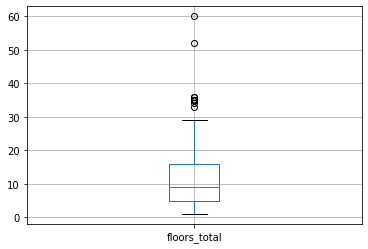

count    23465.000000
mean        10.694865
std          6.597822
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

----------------------------------------------------------------------------------------



In [5]:
data.boxplot(column='floors_total')
plt.show()
print (data['floors_total'].describe()) #Данным способом мы видим срез по данным, отклонения от стандартных значений, минимальные и максимальные значения. Легкий способ, чтобы узнать про данные в столбце. 
data['floors_total'].dropna()
#data.info()
print ()
print('----------------------------------------------------------------------------------------')
print ()


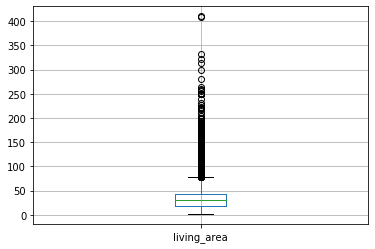


----------------------------------------------------------------------------------------

[nan False True]
False    2698
True       44
Name: is_apartment, dtype: int64

----------------------------------------------------------------------------------------



In [8]:
data.boxplot(column='living_area')
plt.show()
#print(data['living_area'].value_counts())
#living_area_median = data['living_area'].median() #использую медианное значение, так как оно меньше подверженно изменениям.
#data['living_area'] = data['living_area'].fillna(living_area_median)
#data.info()
print ()
print('----------------------------------------------------------------------------------------')
print ()
print(data['is_apartment'].unique())
print (data['is_apartment'].value_counts())
data['is_apartment'] = data['is_apartment'].fillna(False) #В России апартаменты, как вид жилья, появлися относительно недавно. Это значит, что по ним не так много данных. В связи с этим заменил на False
#data.info()
print ()
print('----------------------------------------------------------------------------------------')
print ()

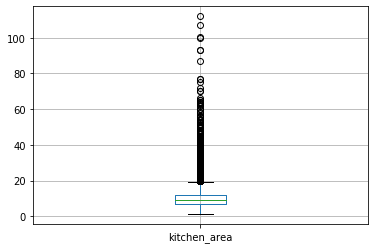


----------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------



In [10]:
data.boxplot(column='kitchen_area')
plt.show()
#data['kitchen_area'].describe()
#kitchen_area_median = data['kitchen_area'].median()
#data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_area_median)
#data.info()
print ()
print('----------------------------------------------------------------------------------------')
print ()
data['balcony'] = data['balcony'].fillna(0).astype('int') #Балкон либо есть, либо нет. Предположим, что пропущенные значения в балконах, это означает их отсутствие. 
#data.info()
print ()
print('----------------------------------------------------------------------------------------')
print ()
data['locality_name'] = data['locality_name'].fillna(" ")
#data.info()
print ()
print('----------------------------------------------------------------------------------------')
print ()
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')
#data.info()
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')
#data.info()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]


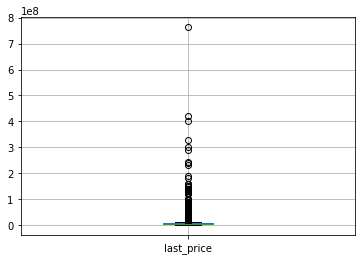


----------------------------------------------------------------------------------------



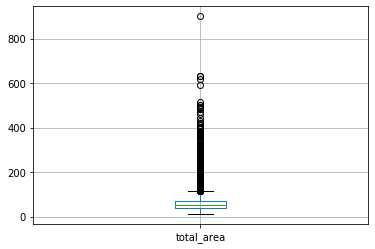

count    23227.000000
mean        57.760688
std         25.367134
min         20.000000
25%         40.000000
50%         51.700000
75%         68.500000
max        180.000000
Name: total_area, dtype: float64


In [12]:
#Заменим формат first_day_exposition столбца на date 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
print(data['first_day_exposition'].head(5))

#Проверим на аномалии столбца, которые на понадобяться в дальнейшем. 
data.boxplot(column='last_price')
plt.show()
data['last_price'].describe()
#Критичных аномалий нет, по диапозону цен явно не Москва) Разница между медианным/средним и максимальным значением небольшая. Можно перевести в int для удоства. 
data['last_price'].astype('int')
print ()
print('----------------------------------------------------------------------------------------')
print ()
data.boxplot(column='total_area')
plt.show()
#data['total_area'].describe()
#есть выбросы значений. Для квартир явно высокие или явно низкие. Избавимся от них. 
data.drop(data[data.total_area > 180].index, inplace=True)
data.drop(data[data.total_area < 20].index, inplace=True)
print (data['total_area'].describe())

#Пропуски и выбросы скорректированны. С данными можно проводить расчеты. 

## Расчёты и добавление результатов в таблицу

In [13]:
# Добавляем в таблицу цену квадратного метра. 
data['price_square_meter'] = data['last_price'] / data['total_area']
data['price_square_meter'] = data['price_square_meter'].astype('int')
#display (data.head(5))

# Добавляем дни недели, месяц и год публикации
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
#display (data.head(5))
#Добавляем этаж квартиры
def flat_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
data['floor_category'] = data.apply(flat_floor, axis=1)
#display (data.head(5))

#Добавляем соотношение жилой и общей площади, а также отношение площади кухни к общей
data['living_area_relat'] = data['living_area'] / data['total_area']
data['kitchen_area_relat'] = data['kitchen_area'] / data['total_area']
display (data.head(5))


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,floor_category,living_area_relat,kitchen_area_relat
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2,755.0,NaN,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,0,NaN,81.0,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,2,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,3,234.0,424.0,408176,4,7,2015,другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000


## Исследовательский анализ данных


count    23227.000000
mean        57.760688
std         25.367134
min         20.000000
25%         40.000000
50%         51.700000
75%         68.500000
max        180.000000
Name: total_area, dtype: float64

45.00     412
42.00     379
60.00     345
31.00     345
44.00     343
         ... 
135.50      1
40.56       1
173.20      1
115.60      1
78.96       1
Name: total_area, Length: 1959, dtype: int64










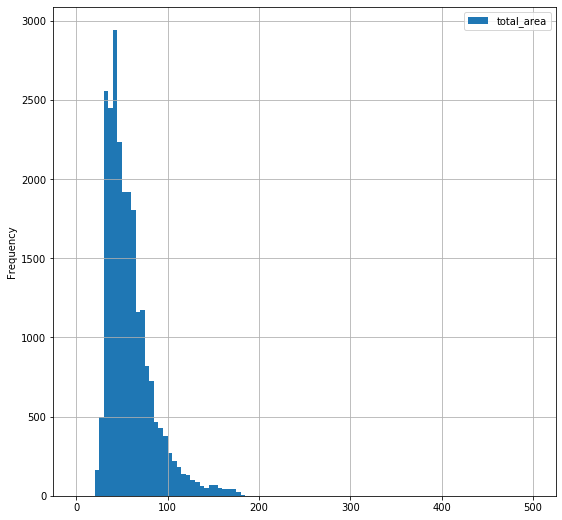

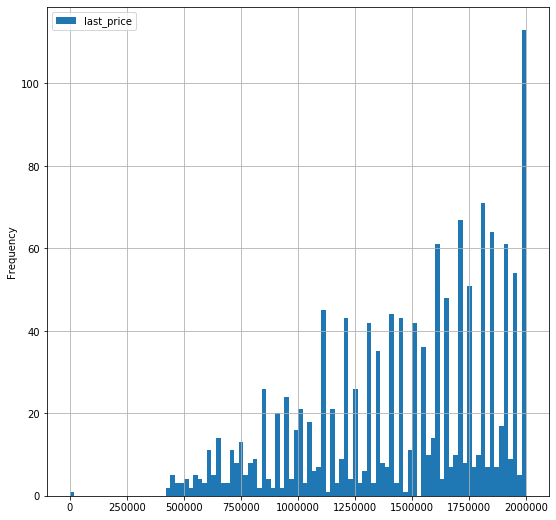

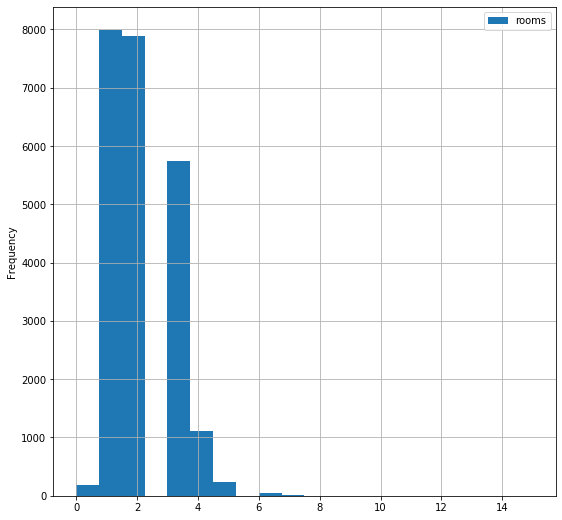

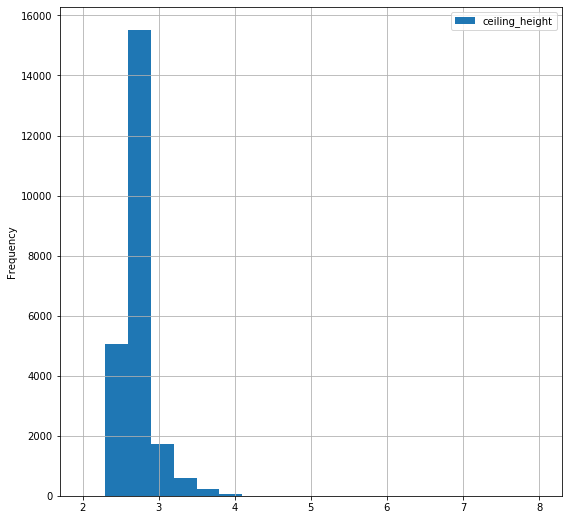

In [14]:
# РАССМОТРИМ РАСПРЕДЕЛЕНИЕ ОБЩЕЙ ПЛОЩАДИ КВАРТИР
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (9,9), range = (0,500))
print ()
print (data['total_area'].describe())
print ()
print (data['total_area'].value_counts())

# Видим пиковое значение на отметки 45 кв.м. Действительно квартир в промежутке от 40 кв.м. до 50 кв.м., превалирующие значения, так как очень много квартир в продаже, построенные в советское время - "хрущевки" с малой квадратурой. При этом в новых домах площадь "евродвушки" варьируется примерно в этом е диапозоне квадратуры. 

print()
print()

# РАССМОТРИМ РАСПРЕДЕЛЕНИЕ ЦЕН
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (9,9), range = (0,2000000))
#data['last_price'].describe()

#Кричтичных отклонений нет, с данными все в порядке. Медиана стоимости квартиры составляет -  4 500 000. 

print()
print()

# РАССМОТРИМ РАСПРЕДЕЛЕНИЕ КОЛИЧЕСТВА КОМНАТ
data.plot(y = 'rooms', kind = 'hist', bins = 20, grid=True, figsize = (9,9), range = (0,15))
data['rooms'].describe()

#Кричтичных отклонений нет, с данными все в порядке. В основном продяют однокомнатные и двухкомнатные квартиры. Соответвенно это мы видим и по квадратуре. 

print()
print()

# РАССМОТРИМ РАСПРЕДЕЛЕНИЕ ВЫСОТЫ ПОТОЛКОВ
data.plot(y = 'ceiling_height', kind = 'hist', bins = 20, grid=True, figsize = (9,9), range = (2,8))
data['ceiling_height'].describe()

#Кричтичных отклонений нет, с данными все в порядке.  У большинства квартир высота потолка 2,6 м., что говорит о советском прошлом данных квартир. 

print()
print()


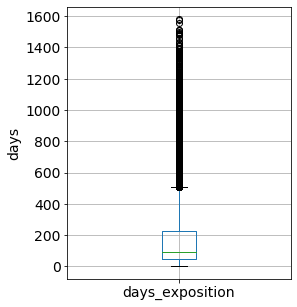

count    20140.000000
mean       179.535204
std        218.200443
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64


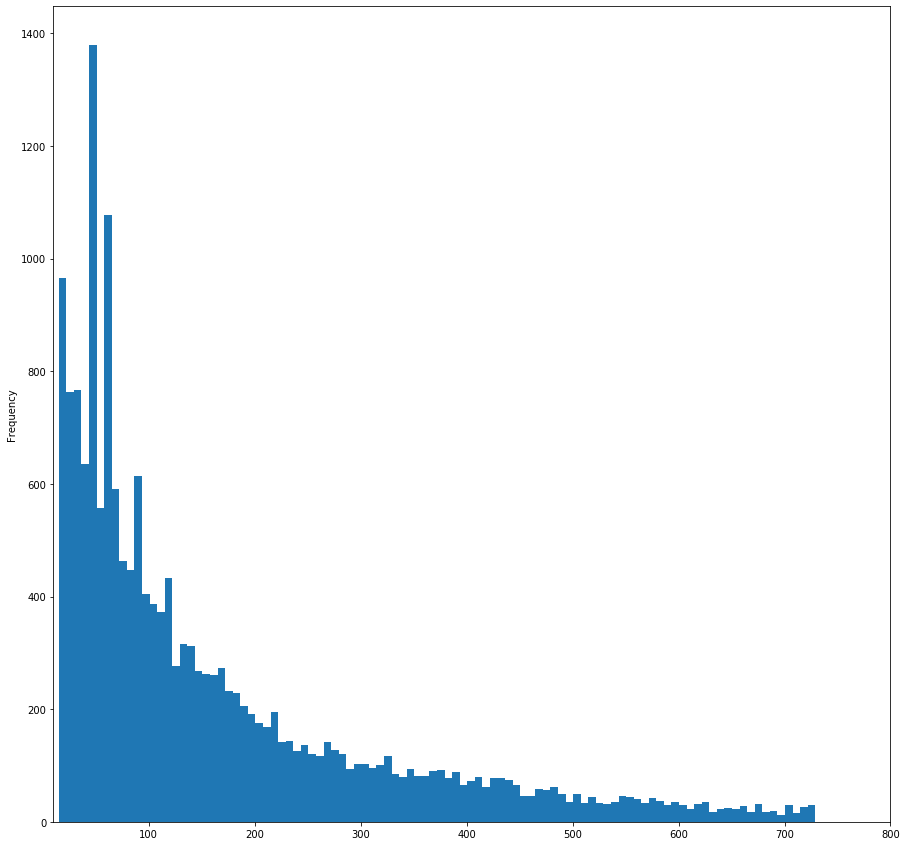

45.0    871
60.0    537
30.0    205
90.0    191
20.0    138
Name: days_exposition, dtype: int64
104.0
164.2983985060268


In [16]:
#data.plot(y='days_exposition', kind='hist', bins=200, figsize=(9,9), xlim=(0,2000))
#plt.xlabel("days")
#plt.show()
data.boxplot(['days_exposition'], figsize=(4,5), fontsize=14)
plt.ylabel('days', fontsize=14)
plt.show()
print(data[data['days_exposition']!=0]['days_exposition'].describe())
#Видны явные выбросы. Проработаем. Быстрой продажей сделаем продажу в 14 дней, а долгой 2 года. 
exposition_data = data.query('14<days_exposition<730')['days_exposition'] 
exposition_data.plot(kind='hist', bins=100, xlim=(10,800), figsize = (15,15))
plt.show()
print(exposition_data.value_counts().head(5))
#Видим, что топ 5 значений 45.0, 60.0, 30.0, 90.0, 20.0.
#Определим медианное значение нового параметра. 
print(exposition_data.median())
print(exposition_data.mean())

#среднее и медианное значение практически не изменились.
#Исходя из графиков и метода discribe можно счатать значения от 14 до 500 нормальными. 


45.0    871
90.0    191
4.0     175
3.0     156
5.0     150
Name: days_exposition, dtype: int64
count    19168.000000
mean       186.553579
std        221.314153
min          1.000000
25%         45.000000
50%        103.000000
75%        241.000000
max       1580.000000
Name: days_exposition, dtype: float64


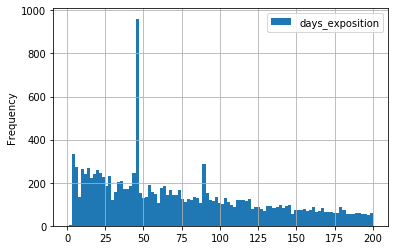

In [17]:
#Убрать редкие и аномальные значения
#Введем новый параметр с очищенными от аномалий 
good_days_exposition = data.query('days_exposition != 45 and days_exposition != 60 and days_exposition != 30 and days_exposition != 90 and days_exposition != 7 and days_exposition != 0')
print()
# Посмотрим на график 
good_days_exposition.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

#Посмтрим на количественные показатели
print(good_days_exposition['days_exposition'].value_counts().head(5))
print (good_days_exposition['days_exposition'].describe())

0.23992180577442568


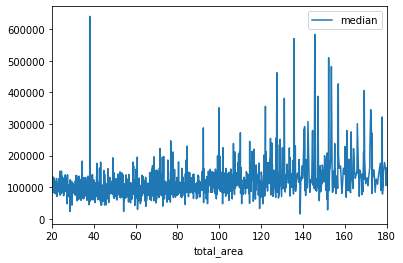

In [18]:
#Какие факторы больше всего влияют на стоимость квартиры
table_total_area = data.pivot_table(index = 'total_area', values = 'price_square_meter', aggfunc = ['mean', 'count', 'median'])
table_total_area.columns = ['mean', 'count', 'median']
table_total_area.plot(y = 'median')
print(data['total_area'].corr(data['price_square_meter']))

In [19]:
#Коэффициент Пирсона показывает, что связь между общей площадью и цены за квадратный метр мизерная. Видно, что цена за примерно 37 квадратов выше чем квартиры с другой квадратурой, что говорит о большем спросе на однокомнатные квартиры.

-0.014774119033554932


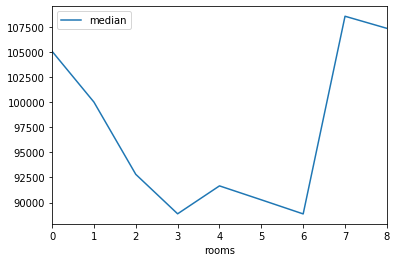

In [21]:
table_rooms = data.pivot_table(index = 'rooms', values = 'price_square_meter', aggfunc = ['mean', 'count', 'median'])
table_rooms.columns = ['mean', 'count', 'median']
table_rooms.plot(y = 'median')
print(data['rooms'].corr(data['price_square_meter']))
#Общая зависимость отрицательная - слабая. Но явно видно, что при приближении к 3м комнатам, стоимость квадратного метра уменьшается

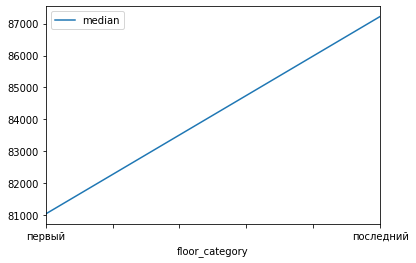

In [22]:
table_floor_category = data.query('floor_category != "другой"').pivot_table(index = 'floor_category', values = 'price_square_meter', aggfunc = ['mean', 'count', 'median'])
table_floor_category.columns = ['mean', 'count', 'median']
table_floor_category.query('count > 1').plot(y = 'median')
#По графику видно, что первый этаж дешевле, чем последний этаж. 

-0.3521845471032442


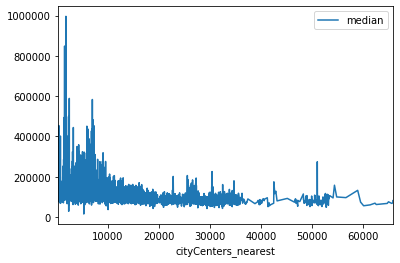

In [23]:
table_cityCenters_nearest = data.pivot_table(index = 'cityCenters_nearest', values = 'price_square_meter', aggfunc = ['mean', 'count', 'median'])
table_cityCenters_nearest.columns = ['mean', 'count', 'median']
table_cityCenters_nearest.plot(y = 'median')
print(data['cityCenters_nearest'].corr(data['price_square_meter']))
#По графику видна явная зависимость стоимости квадратного метра от отдаления от центра. 

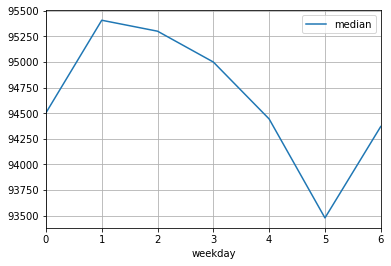

In [24]:
table_weekday = data.pivot_table(index = 'weekday', values = 'price_square_meter', aggfunc = ['mean', 'count', 'median'])
table_weekday.columns = ['mean', 'count', 'median']
table_weekday.plot(y = 'median',grid=True)
#Стоимость выше, когда объявление публикую во вторник и низкая цена, когда предложения публикуются в субботу. Как я понимаю, для увеличения спроса.  

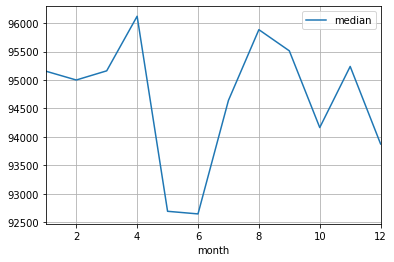

In [25]:
table_month = data.pivot_table(index = 'month', values = 'price_square_meter', aggfunc = ['mean', 'count', 'median'])
table_month.columns = ['mean', 'count', 'median']
table_month.plot(y = 'median',grid=True)
#Видна сезонность в недвижимости, лктом меньше предложени и меньше стоимость недвижимости. 

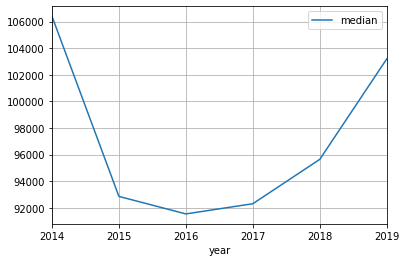

In [26]:
table_year = data.pivot_table(index = 'year', values = 'price_square_meter', aggfunc = ['mean', 'count', 'median'])
table_year.columns = ['mean', 'count', 'median']
table_year.plot(y = 'median',grid=True)
#После кризиса 2014 года стоимость квадратного метра, в среднем, шла на спад до 2016 года, после 2016 года цена только растет. 

In [27]:
table_locality_name = data.pivot_table(index = 'locality_name', values = 'price_square_meter', aggfunc=['count', 'mean'])
table_locality_name.columns = ['count', 'mean']
locality_pivot_table = table_locality_name.sort_values('count', ascending = False).head(10)
print(locality_pivot_table)
print(table_locality_name[table_locality_name['mean']==locality_pivot_table['mean'].max()])
print(table_locality_name[table_locality_name['mean']==locality_pivot_table['mean'].min()])
#Максимальная стоимость и количество предложений в СПб, самая низкая стоимость и наименьшее количество предложений в Выборге. 

                   count           mean
locality_name                          
Санкт-Петербург    15336  113028.545514
посёлок Мурино       520   85724.784615
посёлок Шушары       439   78655.132118
Всеволожск           396   68669.992424
Пушкин               358  102952.737430
Колпино              336   75352.047619
посёлок Парголово    325   90361.923077
Гатчина              306   68757.225490
деревня Кудрово      299   92473.086957
Выборг               232   58123.254310
                 count           mean
locality_name                        
Санкт-Петербург  15336  113028.545514
               count         mean
locality_name                    
Выборг           232  58123.25431


65.968


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,floor_category,living_area_relat,kitchen_area_relat,km_cityCenters_nearest
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,755.0,NaN,120370,3,3,2019,другой,0.472222,0.231481,16
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,NaN,81.0,82920,1,12,2018,первый,0.460396,0.272277,18
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214,13
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,...,234.0,424.0,408176,4,7,2015,другой,NaN,NaN,6
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000,8
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,55.0,95065,0,9,2018,другой,0.473684,0.299342,0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,NaN,155.0,99195,3,11,2017,другой,0.284182,0.386059,19
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,...,NaN,NaN,110544,3,4,2019,другой,NaN,0.263966,11
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,NaN,189.0,87454,2,5,2018,другой,0.465320,0.265682,0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,NaN,289.0,88524,6,2,2017,другой,0.714754,0.106557,15


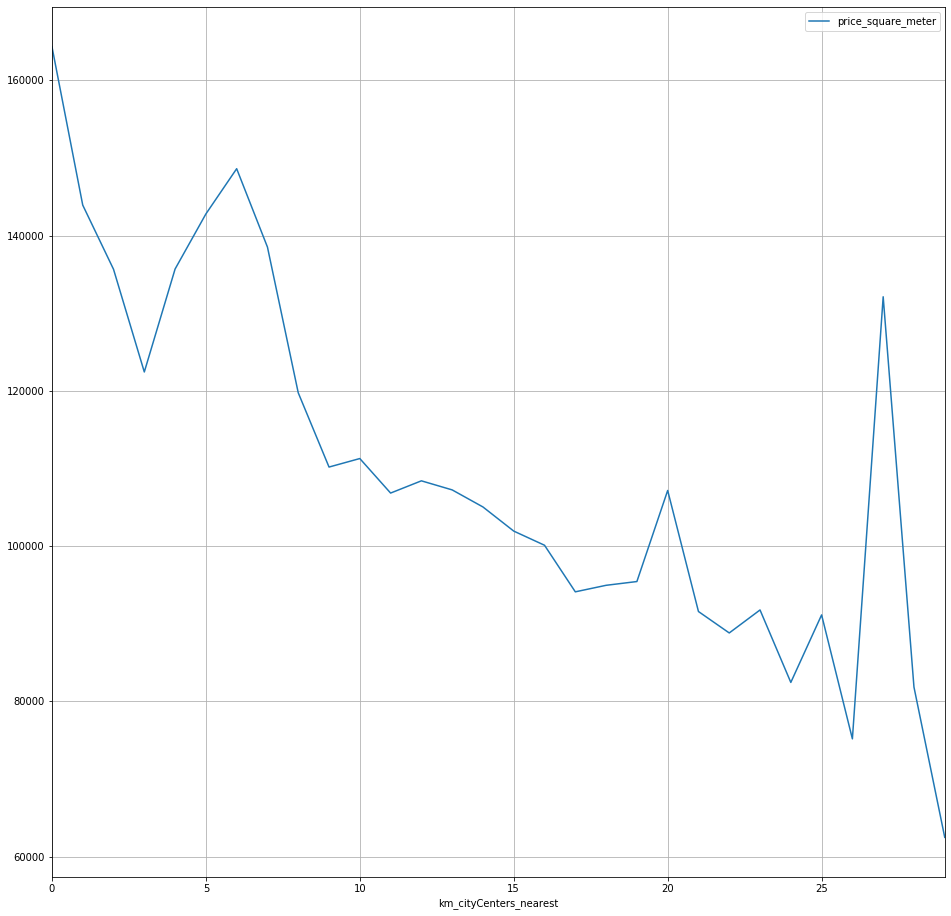

In [28]:
data['km_cityCenters_nearest'] = data['cityCenters_nearest']/1000
print(data['km_cityCenters_nearest'].max())
data['km_cityCenters_nearest'] = data['km_cityCenters_nearest'].fillna(0)
data['km_cityCenters_nearest'] = data['km_cityCenters_nearest'].astype('int')
pivot_table_km = data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'km_cityCenters_nearest', values = 'price_square_meter', aggfunc = 'mean')
pivot_table_km.plot(grid=True, figsize = (16,16))
display(data.head(10))
#График меняется на примерно на 3х киллометрах, что будет являться границей. 



-0.15981963075206113

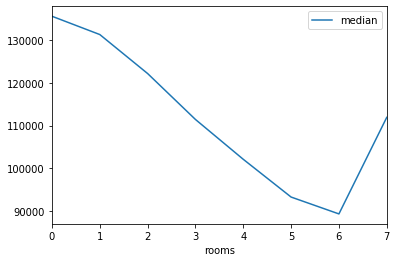

In [29]:
cityCenters_nearest_spb = data.query('km_cityCenters_nearest <= 3 and locality_name == "Санкт-Петербург"')

cityCenters_nearest_spb_rooms = cityCenters_nearest_spb.pivot_table(index = 'rooms', values = 'price_square_meter', aggfunc = ['mean', 'count', 'median'])
cityCenters_nearest_spb_rooms.columns = ['mean', 'count', 'median']
cityCenters_nearest_spb_rooms.plot(y = 'median')

cityCenters_nearest_spb_rooms.sort_values('median', ascending = False)

cityCenters_nearest_spb['rooms'].corr(cityCenters_nearest_spb['price_square_meter'])

#Коэффициент корреляции показывает отсутствие связи. Но в СПб отличается график, стоимость снижается ближе к 6 комнатам, а не к 3, как в общей выборке. 

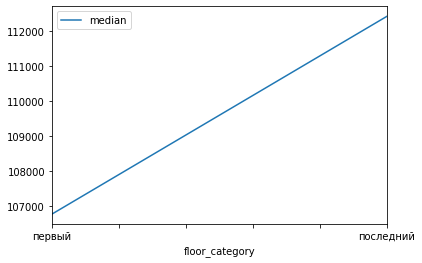

In [30]:
spb_table_floor_category = cityCenters_nearest_spb.query('floor_category != "другой"').pivot_table(index = 'floor_category', values = 'price_square_meter', aggfunc = ['mean', 'count', 'median'])
spb_table_floor_category.columns = ['mean', 'count', 'median']
spb_table_floor_category.plot(y = 'median') 
#Аналогичная ситуация в СПБ, квартиры на последнем этаже стоят дороже первого. 

-0.18456963128542403

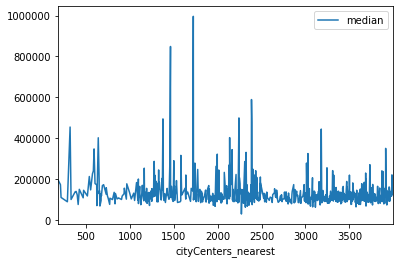

In [31]:
cityCenters_nearest_spb_1 = cityCenters_nearest_spb.pivot_table(index = 'cityCenters_nearest', values = 'price_square_meter', aggfunc = ['mean', 'count', 'median'])
cityCenters_nearest_spb_1.columns = ['mean', 'count', 'median']
cityCenters_nearest_spb_1.plot(y = 'median')
cityCenters_nearest_spb['cityCenters_nearest'].corr(cityCenters_nearest_spb['price_square_meter'])
#Как и в общей выборке, связи по коэффициенту корреляции - нет.Это видно и по графику 

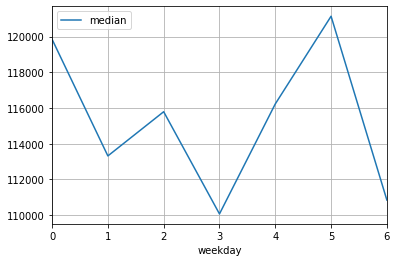

In [32]:
table_weekday_spb = cityCenters_nearest_spb.pivot_table(index = 'weekday', values = 'price_square_meter', aggfunc = ['mean', 'count', 'median'])
table_weekday_spb.columns = ['mean', 'count', 'median']
table_weekday_spb.plot(y = 'median',grid=True)
#Ситуация в СПб отличается от общей выборки. Наименьшая цена в четверг, нивысшая цена в субботу и в понедельник. 

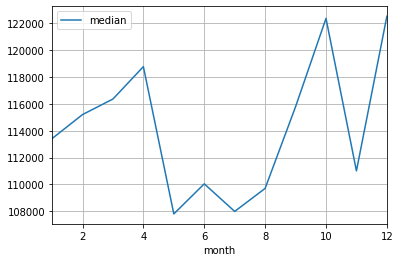

In [33]:
table_month_spb = cityCenters_nearest_spb.pivot_table(index = 'month', values = 'price_square_meter', aggfunc = ['mean', 'count', 'median'])
table_month_spb.columns = ['mean', 'count', 'median']
table_month_spb.plot(y = 'median',grid=True)
#Данные, аналогичны общей выборке, видна сезонность. 

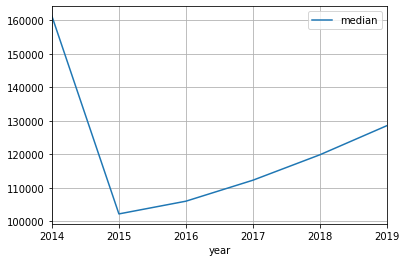

In [34]:
table_year_spb = cityCenters_nearest_spb.pivot_table(index = 'year', values = 'price_square_meter', aggfunc = ['mean', 'count', 'median'])
table_year_spb.columns = ['mean', 'count', 'median']
table_year_spb.plot(y = 'median',grid=True)
#Данные отличаются от общей выборки. В СПб падение цен было до 2015 года, после чего виден тренд на рост, при чем не резкий. 

## Общий вывод

1. При ознакомлении с данными были выявлены пропуски и аномалии, которые в дальнейшем были обработаны. 

2. Были обработаны пропуски в столбцах, которые были необходимы для анализа данных. Также, были обработаны аномалии и выбросы. 

3. Также, были расчитаны стоимость квадратного метра, отношения жилой и общей площади, кухни и общей площади. Добавлены дни, месяцы и года публикации объявлений, категории этажности. 

4. Исследовательский анализ выявил: 
    a. Средняя продолжительность публикации объявлений составляет четь более 90 дней. 
    b. Выявлена зависимость между стоимости квартиры от площади, количества комнат и отдалению от центра. 
    c. Также, выявлена зависимость от этажа. Первый этаж дешевле остальных. 
    d. В связи с кризисом, был выявлен тренд на снижение стоимости квартир с 2014 по 2017 год. 
    e. Выявлена сезонность увеличения и спада цен на недвижимость. Летом спад, в апреле рост. 
    f. Квартиры выставляются дешевле в восересенье, дороже во вторник. Предположительно, это связано с увеичением спроса на просмотр предложений в воскресенье. 
    g. Согласно выборки, самые дорогие квартиры находятся в СПб, самые дешевые в Выборге. 
    h. Граница центра для СПб была определена 3-мя километрами. 
    i. По СПб практически все данные сходтся с общей выборкой. 
    j. Стомисоть квартир в СПб
    
10. Стоимость квартир в центре также зависит от количества комнат, от этажа (на первом - дешевле), а от удаленности цена квартиры не зависит, в отличие от квартир из всей выборки.
11. Стоимость квартир в центре Санкт-Петербурга также упала с 2014 года.
12. По самой дешевой цене квартиры продаются в декабре, по самой дорогой - в сентябре
13. Квартиры, размещаемые на продажу по четвергам продаются дешевле, чем в остальные дни. Пик стоимости приходится на воскресенье

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод